<a href="https://colab.research.google.com/github/manelchadouli/1CS/blob/main/A*%20search%20algo%20implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ROBOTICS HOMEWORK
A* search algorithm implementation and a vedio demo

1)FFmpeg for generatiing vedio out of the frames

In [8]:
!apt-get install -y ffmpeg


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


the search algorithm implementation

<ipython-input-31-ff1a05792ece>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


[[ v  0  0  0  0  0 ],
 [ v  0  >  >  >  v ],
 [ v  0  ^  0  v  v ],
 [ v  0  ^  0  v  v ],
 [ >  >  ^  0  0  0 ]]

[[4, 5], [3, 5], [2, 5], [1, 5], [1, 4], [1, 3], [1, 2], [2, 2], [3, 2], [4, 2], [4, 1], [4, 0], [3, 0], [2, 0], [1, 0], [0, 0]]
[[ v  x  x  x  x  x ],
 [ v  x  >  >  >  v ],
 [ v  x  ^  x  x  v ],
 [ v  x  ^  x  x  v ],
 [ >  >  ^  x  x  * ]]


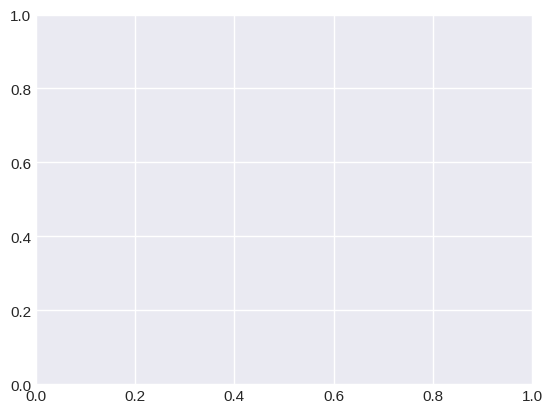

In [31]:
# %matplotlib notebook
import shutil
import os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

plt.style.use('seaborn-darkgrid')

def print_line(line, delimiter):
    print('[', end="")
    for c in line:
        print("{:^3}".format(str(c)), end="")
    print(']', end="")
    if delimiter:
        print(',', end="")

def print_2d_list(input_list):
    print('[', end="")
    print_line(input_list[0], True)
    print()
    for row in input_list[1:-1]:
        print(" ", end="")
        print_line(row, True)
        print()
    print(" ", end="")
    print_line(input_list[-1], False)
    print(']')

def is_in_map(grid, x, y):
    if 0 <= x < len(grid) and 0 <= y < len(grid[0]):
        return True
    return False

def valid_step(grid, observed, x, y):
    if is_in_map(grid, x, y):
        if grid[x][y] == 0 and observed[x][y] == 0:
            return True
        return False

def search(grid, heuristic, init, goal, cost, delta, delta_name):
    x = init[0]
    y = init[1]
    f = heuristic[x][y]
    g = 0
    observed_cells = [[0 for cell in row] for row in grid]
    moves = [[0 for cell in row] for row in grid]
    expansion = [[0 for cell in row] for row in grid]
    search_queue = [[f, g, x, y]]

    found = False
    resign = False

    while not found and not resign:
        if len(search_queue) == 0:
            resign = True
        else:
            search_queue.sort()
            next = search_queue.pop(0)
            f = next[0]
            g = next[1]
            x = next[2]
            y = next[3]

            if x == goal[0] and y == goal[1]:
                found = True
            else:
                for i in range(len(delta)):
                    x_next = x + delta[i][0]
                    y_next = y + delta[i][1]
                    if valid_step(grid, observed_cells, x_next, y_next):
                        g_next = g + cost
                        f_next = g_next + heuristic[x_next][y_next]
                        search_queue.append([f_next, g_next, x_next, y_next])
                        observed_cells[x_next][y_next] = 1
                        moves[x_next][y_next] = i
                        expansion[x][y] = delta_name[i]

    return [expansion, moves]

def shortest_path_finder(actions, delta, delta_name, init, goal):
    x = goal[0]
    y = goal[1]
    policy = [["x" for cell in row] for row in actions]
    policy[x][y] = '*'
    shortest_path = [[x, y]]

    while x != init[0] or y != init[1]:
        x_back = x - delta[actions[x][y]][0]
        y_back = y - delta[actions[x][y]][1]
        policy[x_back][y_back] = delta_name[actions[x][y]]
        x = x_back
        y = y_back
        shortest_path.append([x, y])

    return policy, shortest_path

def plot_grid(grid, title):
    plt.figure(figsize=(len(grid[0]), len(grid)))
    cmap = plt.colormaps['Blues']
    norm = plt.Normalize(0, len(np.unique(grid)) - 1)
    img = plt.imshow([[np.where(np.unique(grid) == val)[0][0] for val in row] for row in grid], cmap=cmap, norm=norm, interpolation='nearest', origin='upper')
    plt.title(title)
    plt.colorbar(ticks=np.arange(len(np.unique(grid))))
    return img
def save_frames(ims, folder='frames'):
    # Create a folder to store frames
    if not os.path.exists(folder):
        os.makedirs(folder)

    # Save each frame as an image
    for i, im in enumerate(ims):
        im[0].get_figure().savefig(f"{folder}/frame_{i:03d}.png")
        plt.close(im[0].get_figure())

    # Create a zip file containing the frames
    shutil.make_archive(folder, 'zip', folder)

def main():
    grid = [[0, 1, 0, 0, 0, 0],
            [0, 1, 0, 0, 0, 0],
            [0, 1, 0, 1, 0, 0],
            [0, 1, 0, 1, 0, 0],
            [0, 0, 0, 1, 0, 0]]

    heuristic = [[9, 8, 7, 6, 5, 4],
                  [8, 7, 6, 5, 4, 3],
                  [7, 6, 5, 4, 3, 2],
                  [6, 5, 4, 3, 2, 1],
                  [5, 4, 3, 2, 1, 0]]

    init = [0, 0]
    goal = [len(grid) - 1, len(grid[0]) - 1]
    cost = 1

    delta = [[-1, 0],  # go up
             [0, -1],  # go left
             [1, 0],   # go down
             [0, 1]]   # go right

    delta_name = ['^', '<', 'v', '>']

    expansions, actions_ids = search(grid, heuristic, init, goal, cost, delta, delta_name)
    policy, shortest_path = shortest_path_finder(actions_ids, delta, delta_name, init, goal)

    print_2d_list(expansions)
    print()
    print(shortest_path)
    print_2d_list(policy)

    # Plot the grid and expansion map
    fig, ax = plt.subplots()
    ims = []

    for step, path_point in enumerate(shortest_path):
        policy, _ = shortest_path_finder(actions_ids, delta, delta_name, init, path_point)
        ims.append([plot_grid(policy, f"Step {step + 1}")])

    save_frames(ims)

if __name__ == "__main__":
    %matplotlib inline
    main()



genrating output.mp4 of the frames

In [29]:
!ffmpeg -framerate 1 -i frames/frame_%03d.png -c:v libx264 -r 30 -pix_fmt yuv420p output.mp4


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [30]:
ls frames


frame_000.png  frame_003.png  frame_006.png  frame_009.png  frame_012.png  frame_015.png
frame_001.png  frame_004.png  frame_007.png  frame_010.png  frame_013.png
frame_002.png  frame_005.png  frame_008.png  frame_011.png  frame_014.png
